In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
import warnings
warnings.filterwarnings('ignore')



Populating the interactive namespace from numpy and matplotlib


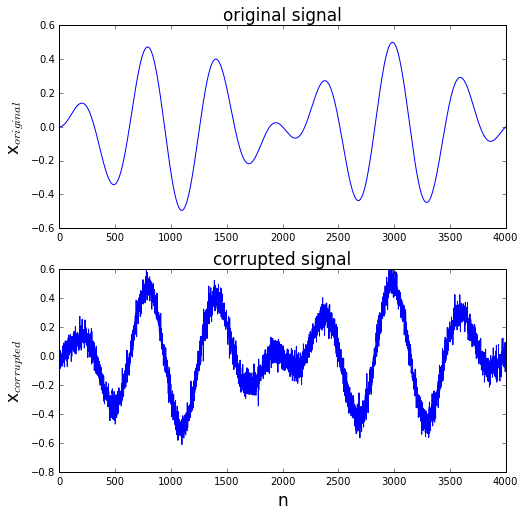

In [2]:
%matplotlib inline

n = 4000
t = [t_cont for t_cont in range(0,n)]
t = np.array(t)
exact = 0.5*np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
corrupt = exact + 0.05 * np.random.randn(exact.shape[0])


%pylab inline
pylab.rcParams['figure.figsize'] = (8, 8)

plt.subplot(2,1,1)
plt.plot(t,exact)
plt.title('original signal' , fontsize = 17)
plt.ylabel('x$_{original}$', fontsize = 17)

plt.subplot(2,1,2)
plt.plot(t, corrupt)
plt.ylabel('x$_{corrupted}$', fontsize = 17)
plt.xlabel('n', fontsize = 17)
plt.title('corrupted signal', fontsize = 17)
plt.show()

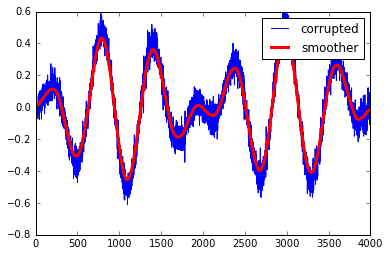

In [3]:
%matplotlib inline

n=4000
D = np.zeros((n-1, n))
D[:,0:n-1] = -np.eye(n-1)
D[:,1:n] = D[:,1:n+1] + np.eye(n-1)

mu = 1000

A = np.concatenate((np.eye(n), np.sqrt(mu)*D), 0)
b = np.concatenate((corrupt, np.zeros((n-1, ))), 0)

sol = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

plt.plot(t, corrupt)
plt.plot(t, sol, 'r', linewidth = 3)
plt.legend(['corrupted', 'smoother'], loc = 1)

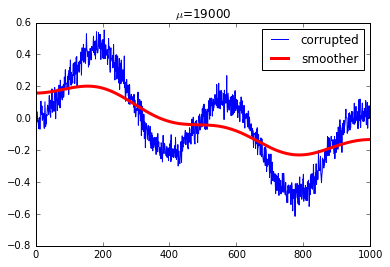

In [10]:
%matplotlib inline

n = 1000

t = [t_x for t_x in range(0,n)]
t = np.array(t)
exact = 0.5*np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
corrupt = exact + 0.05 * np.random.randn(exact.shape[0])

D = np.zeros((n-1, n))
D[:,0:n-1] = -np.eye(n-1)
D[:,1:n] = D[:,1:n+1] + np.eye(n-1)

def smooth_plot(mu = 1000):
    A = np.concatenate((np.eye(n), np.sqrt(mu)*D), 0)
   
    b = np.concatenate((corrupt, np.zeros((n-1, ))), 0)

    sol = LA.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

    plt.plot(t, corrupt)
    plt.plot(t, sol, 'r', linewidth = 3)
    plt.legend(['corrupted', 'smoother'], loc = 1)
    title = '=%s' % str(mu)
    plt.title('$\mu$' + title)
    plt.show()
from IPython.html.widgets import interact
interact(smooth_plot, mu=[0, 100000, 500]);

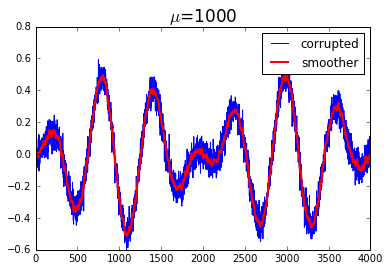

In [11]:
%matplotlib inline

n = 4000
t = [t_x for t_x in range(0,n)]
t = np.array(t)
exact = 0.5*np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
corrupt = exact + 0.05 * np.random.randn(exact.shape[0])

mu = 1000

x = cvx.Variable(n)
objective = cvx.Minimize(cvx.square(cvx.norm2(x-corrupt)) + mu*cvx.square(cvx.norm2(x[1:n]-x[0:n-1])))
constraint = []

Prob = cvx.Problem(objective, constraint)
result = Prob.solve()

plt.plot(t, corrupt)
plt.plot(t, x.value, 'r', linewidth = 2)
title = '=%s' % str(mu)
plt.title('$\mu$' + title, fontsize = 17)
plt.legend(['corrupted', 'smoother'], loc = 1)
plt.show()


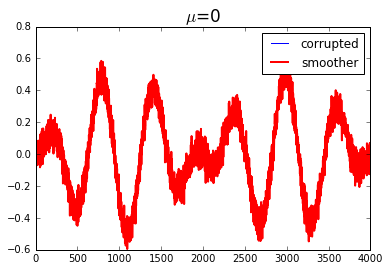

In [12]:
%matplotlib inline

n = 4000

t = [t_x for t_x in range(0,n)]
t = np.array(t)
exact = 0.5*np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
corrupt = exact + 0.05 * np.random.randn(exact.shape[0])

def smooth_plot_cvx(mu = 1000):
    x = cvx.Variable(n)
    objective = cvx.Minimize(cvx.square(cvx.norm2(x-corrupt)) + mu*cvx.square(cvx.norm2(x[1:n]-x[0:n-1])))
    constraint = []

    Prob = cvx.Problem(objective, constraint)
    result = Prob.solve(solver = 'SCS')

    plt.plot(t, corrupt)
    plt.plot(t, x.value, 'r', linewidth = 2)
    title = '=%s' % str(mu)
    plt.title('$\mu$' + title, fontsize = 17)
    plt.legend(['corrupted', 'smoother'], loc = 1)
    plt.show()

from IPython.html.widgets import interact
interact(smooth_plot_cvx, mu=[0, 100000, 500]);

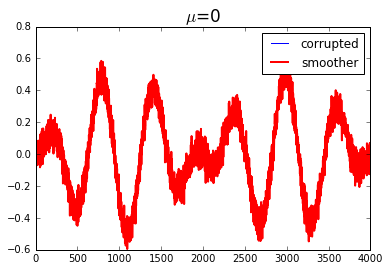

In [7]:
%matplotlib inline

n = 4000

t = [t_x for t_x in range(0,n)]
t = np.array(t)
exact = 0.5*np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
corrupt = exact + 0.05 * np.random.randn(exact.shape[0])

def smooth_plot_cvx(mu = 10):
    x = cvx.Variable(n)
    objective = cvx.Minimize(cvx.norm2(x-corrupt) + mu*cvx.norm2(x[1:n]-x[0:n-1]))
    constraint = []

    Prob = cvx.Problem(objective, constraint)
    result = Prob.solve(solver = 'SCS')

    plt.plot(t, corrupt)
    plt.plot(t, x.value, 'r', linewidth = 2)
    title = '=%s' % str(mu)
    plt.title('$\mu$' + title, fontsize = 17)
    plt.legend(['corrupted', 'smoother'], loc = 1)
    plt.show()

from IPython.html.widgets import interact
interact(smooth_plot_cvx, mu=[0, 500, 10]);

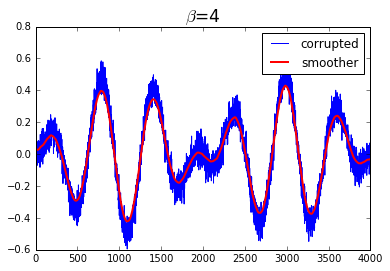

In [8]:
%matplotlib inline

n = 4000

t = [t_x for t_x in range(0,n)]
t = np.array(t)
exact = 0.5*np.sin((2*np.pi/n)*t)*(np.sin(0.01*t))
corrupt = exact + 0.05 * np.random.randn(exact.shape[0])

def smooth_plot_cvx_constant(beta = 3):
    x = cvx.Variable(n)
    objective = cvx.Minimize(cvx.norm2(x[1:n]-x[0:n-1]))
    constraint = [cvx.norm2(x-corrupt) <= beta]

    Prob = cvx.Problem(objective, constraint)
    result = Prob.solve(solver = 'SCS')

    plt.plot(t, corrupt)
    plt.plot(t, x.value, 'r', linewidth = 2)
    title = '=%s' % str(beta)
    plt.title(r'$\beta$' + title, fontsize = 17)
    plt.legend(['corrupted', 'smoother'], loc = 1)
    plt.show()

from IPython.html.widgets import interact
interact(smooth_plot_cvx_constant, beta=[0, 20, 1]);

Sharp transition + noise

Populating the interactive namespace from numpy and matplotlib


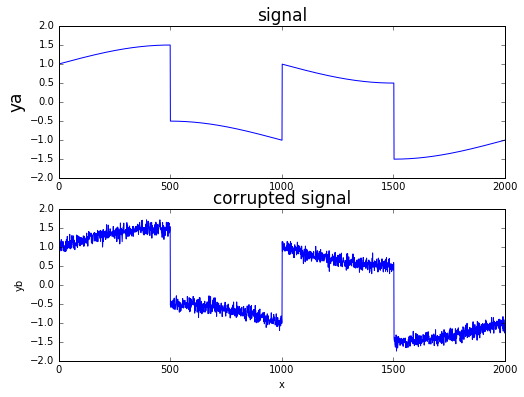

In [24]:
%matplotlib inline

n = 2000
t = [t_x for t_x in range(0,n)]
t = np.array(t)

exact = np.ones((2004,))
exact[0:501] = np.ones((501,))
exact[501:1002] = - np.ones((501,))
exact[1002:1503] = np.ones((501,))
exact[1503:2004] = - np.ones((501,))

x = exact[0:n] + 0.5*np.sin((2*np.pi/n)*t)
exact_varitation = np.sum(np.abs(exact[1:n] - exact[0:n-1]))


%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

plt.subplot(2,1,1)
plt.plot(t,x)
plt.ylim([-2.0,2.0])
plt.title('signal' , fontsize = 17)
plt.ylabel('ya', fontsize = 17)

noise = 0.1*np.random.randn(t.shape[0])
corrupt = x + noise
noisy_variation = np.sum(np.abs(corrupt[1:n] - corrupt[0:n-1]))

plt.subplot(2,1,2)
plt.plot(t, corrupt)
plt.title('corrupted signal' , fontsize = 17)
plt.ylabel('yb')
plt.xlabel('x')
plt.show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


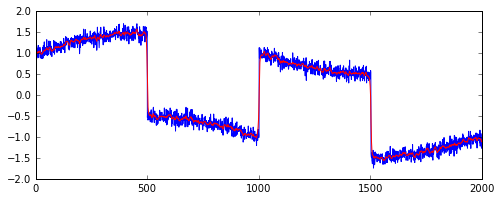

In [34]:
%matplotlib inline

beta = 1.2

x = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm2(x-corrupt))
constraint = [cvx.norm2(x[1:n]-x[0:n-1]) <= beta]
prob = cvx.Problem(objective, constraint)
result = prob.solve()

%pylab inline
pylab.rcParams['figure.figsize'] = (8, 3)

plt.plot(t, corrupt)
plt.plot(t, x.value, 'r')
plt.show()

Populating the interactive namespace from numpy and matplotlib


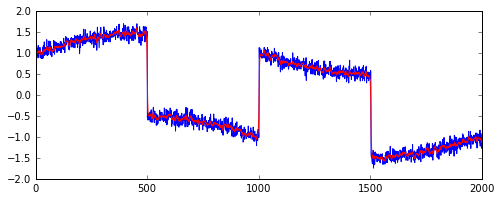

In [37]:
# CVX norm L2 with norm L2 constraints
def transition_plot(beta = 0.8):
    x = cvx.Variable(n)
    objective = cvx.Minimize(cvx.norm2(x-corrupt))
    constraint = [cvx.norm2(x[1:n]-x[0:n-1]) <= beta]
    prob = cvx.Problem(objective, constraint)
    result = prob.solve()

    %pylab inline
    pylab.rcParams['figure.figsize'] = (8, 3)

    plt.plot(t, corrupt)
    plt.plot(t, x.value, 'r')
    plt.show()

from IPython.html.widgets import interact
interact(transition_plot, beta=[0.2, 1.6, 0.2]);

Populating the interactive namespace from numpy and matplotlib


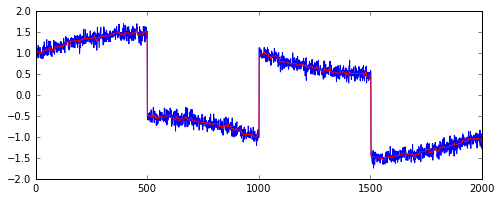

In [39]:
#CVX norm L2 with norm L1 constraints

def transition_plot(beta = 0.8):
    x = cvx.Variable(n)
    objective = cvx.Minimize(cvx.norm2(x-corrupt))
    constraint = [cvx.norm1(x[1:n]-x[0:n-1]) <= beta]
    prob = cvx.Problem(objective, constraint)
    result = prob.solve()

    %pylab inline
    pylab.rcParams['figure.figsize'] = (8, 3)

    plt.plot(t, corrupt)
    plt.plot(t, x.value, 'r')
    plt.show()

from IPython.html.widgets import interact
interact(transition_plot, beta=[2, 16, 1]);

Total variation image reconstruction

In [2]:
from scipy import stats, misc
%matplotlib inline

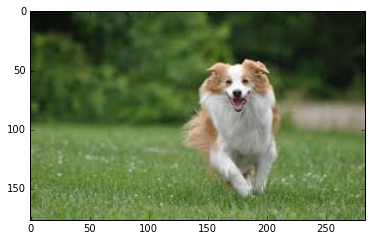

In [3]:
im = misc.imread('./image_files/dog.jpg')
plt.imshow(im)
plt.show()

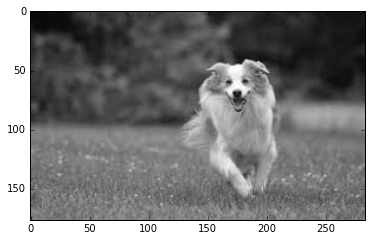

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

imbw = rgb2gray(im)
plt.imshow(imbw, cmap = plt.get_cmap('gray'))
plt.show()

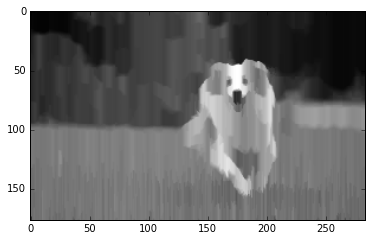

In [32]:
#cvx only can pyhon 2.7

[row, col] = np.shape(imbw)
n = row*col

imbws = np.reshape(imbw, (n, 1), order='F')
beta = 70000

x = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm2(x-imbws))
constraint = [cvx.norm1(x[1:n] - x[0:n-1]) <= beta]
prob = cvx.Problem(objective, constraint)
result = prob.solve()

imbwr = np.reshape(x.value, (row, col), order = 'F')

plt.imshow(imbwr, cmap = plt.get_cmap('gray'))
plt.show()

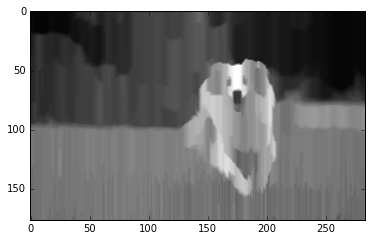

In [34]:
#cvx only can pyhon 2.7
def image_plot(beta = 60000):
    [row, col] = np.shape(imbw)
    n = row*col
    imbws = np.reshape(imbw, (n, 1), order='F')

    x = cvx.Variable(n)
    objective = cvx.Minimize(cvx.norm2(x-imbws))
    constraint = [cvx.norm1(x[1:n] - x[0:n-1]) <= beta]
    prob = cvx.Problem(objective, constraint)
    result = prob.solve()

    imbwr = np.reshape(x.value, (row, col), order = 'F')


    plt.imshow(imbwr, cmap = plt.get_cmap('gray'))
    plt.show()
    
    
from IPython.html.widgets import interact
interact(image_plot, beta=[30000, 100000, 5000]);